<a href="https://colab.research.google.com/github/Camicb/practice/blob/main/Assignment_1_Intermediate_Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Data
The training dataset consists of 50,000 32X32 colour images of 10 different objects. These are the different classes of images in the dataset.

* Ship
* Aeroplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Truck

In [1]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

2.4.0


In [2]:
# Setting a seed for reproducibility
from numpy.random import seed
seed(1)

In [3]:
#Loading Cifar-10 data

from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

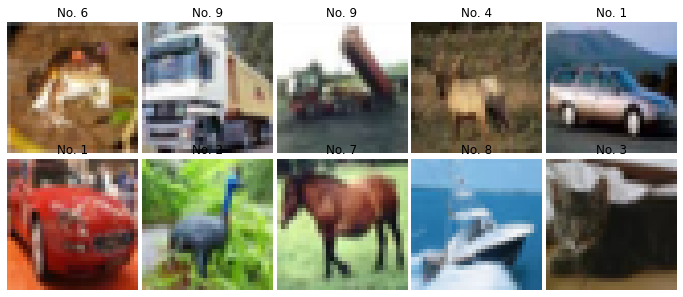

In [5]:
# Visualizing some examples

num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( x_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

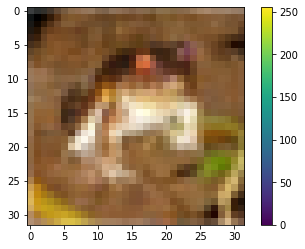

In [6]:
# Inspecting pixels values
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# Preprocessing the data
x_train=x_train/255
x_test=x_test/255

x=np.concatenate((x_train, x_test), axis=0)
x_train_flattened = x.reshape(len(x), 32*32*3)
y=np.concatenate((y_train, y_test), axis=0)

In [8]:
# Creating a neural network model
model = tf.keras.Sequential([               
    tf.keras.layers.Dense(8192, input_shape=(3072,), activation='relu'), 
    tf.keras.layers.Dense(4096, input_shape=(8192,), activation='relu'),
    tf.keras.layers.Dropout(0.2),                         
    tf.keras.layers.Dense(2048, input_shape=(4096,), activation='relu'),
    tf.keras.layers.Dropout(0.175),
    tf.keras.layers.Dense(1024, input_shape=(2048,),activation='relu'),
    tf.keras.layers.Dense(512, input_shape=(1024,),activation='relu'),
    tf.keras.layers.Dropout(0.16),
    tf.keras.layers.Dense(256, input_shape=(512,),activation='relu'),
    tf.keras.layers.Dense(128, input_shape=(256,),activation='relu'),
    tf.keras.layers.Dropout(0.14),
    tf.keras.layers.Dense(64, input_shape=(128,),activation='relu'),
    tf.keras.layers.Dense(32, input_shape=(64,),activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8192)              25174016  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               5

In [9]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

earlystopping_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True)

In [ ]:
# Fitting the model
model.fit(x_train_flattened, y, batch_size=100, epochs=50, validation_split=0.1, callbacks=[tensorboard_callback, earlystopping_callback])


In [ ]:
# Evaluation of the model
%tensorboard --logdir logs/fit

In [ ]:
y_predict = model.predict(x_train_flattened)
x = y_predict.shape[0]
y_pred = np.ones((60000,1))
for i in range(x):
    y_pred[i] = np.argmax(y_predict[i])
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y)